# 1. Loading data from Kaggle



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"toxicmopsik","key":"43e4b73de663d43864fece6a23a52b2a"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide            Covid Cases and Deaths WorldWide                     8KB  2023-02-01 12:22:51           1523         43  1.0              
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31          11027        360  1.0              
datascientistanna/customers-dataset                             Shop Customer Data                                  23KB  2023-02-07 18:42:21           1321         34  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels       M

In [ ]:
! kaggle competitions download -c diy-aging-clocks

 80% 2.00M/2.51M [00:01<00:00, 2.20MB/s]
100% 2.51M/2.51M [00:01<00:00, 2.30MB/s]


In [ ]:
! mkdir data

In [ ]:
! unzip diy-aging-clocks.zip -d data

Archive:  diy-aging-clocks.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

In [ ]:
path_data_sample_submission = "data/sample_submission.csv"

In [ ]:
sample_submission = pd.read_csv(path_data_sample_submission, index_col=0)

In [ ]:
sample_submission

,Predicted
Id,
0,18.0
1,18.0
2,18.0
3,18.0
4,18.0
...,...
7445,18.0
7446,18.0
7447,18.0


In [ ]:
path_data_train = "data/train.csv"

In [ ]:
data_train = pd.read_csv(path_data_train)

In [ ]:
data_train

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,sex,age,id
0,5.0,33.1,9.1,55.2,1.5,1.2,1.7,0.5,2.8,0.1,...,1.160,93.6,32.1,34.3,13.1,305.0,7.6,M,19,1000000
1,6.3,60.3,8.6,28.1,2.3,0.8,3.8,0.5,1.8,0.1,...,37.400,84.6,29.0,34.3,12.1,450.0,8.1,M,4,1000001
2,7.6,25.7,7.4,59.2,6.9,0.9,2.0,0.6,4.5,0.5,...,0.011,90.5,29.2,32.3,12.6,261.0,8.8,F,14,1000002
3,5.6,31.7,8.9,58.2,1.1,0.3,1.8,0.5,3.3,0.1,...,42.800,92.6,31.7,34.3,12.4,237.0,8.3,M,42,1000003
4,6.7,33.6,8.2,54.3,3.0,1.1,2.3,0.5,3.6,0.2,...,0.011,90.3,30.3,33.6,13.3,214.0,8.9,F,17,1000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67037,5.1,40.3,20.6,37.2,1.7,0.2,2.1,1.1,1.9,0.1,...,41.600,93.0,31.5,33.9,11.9,331.0,7.8,M,16,1067037
67038,6.8,33.3,6.3,57.6,2.4,0.4,2.3,0.4,3.9,0.2,...,46.100,89.9,30.1,33.6,12.9,209.0,8.3,M,60,1067038
67039,4.4,47.5,10.3,39.5,1.7,1.0,2.1,0.5,1.7,0.1,...,33.100,80.4,26.9,33.5,15.9,332.0,6.3,F,33,1067039
67040,6.6,21.4,8.8,66.1,2.7,1.0,1.4,0.6,4.4,0.2,...,39.000,84.2,28.1,33.3,13.8,371.0,8.0,F,24,1067040


In [ ]:
path_data_test = "data/test.csv"

In [ ]:
data_test = pd.read_csv(path_data_test)

In [ ]:
data_test.head()

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,sex,id
0,7.9,28.7,9.0,59.7,1.8,0.8,2.3,0.7,4.7,0.1,...,14.3,42.000,85.1,29.0,34.1,11.7,335.0,7.3,M,0
1,8.2,23.7,11.4,59.3,5.1,0.5,1.9,0.9,4.9,0.4,...,16.0,47.500,83.5,28.2,33.7,12.8,260.0,7.8,M,1
2,6.8,19.8,5.3,73.4,1.0,0.5,1.3,0.4,5.0,0.1,...,15.5,0.011,81.0,27.6,34.0,13.1,251.0,7.9,M,2
3,5.9,26.3,7.8,61.1,4.3,0.6,1.6,0.5,3.6,0.3,...,13.4,39.800,85.4,28.7,33.6,12.8,162.0,7.9,M,3
4,8.6,20.9,9.5,64.4,4.7,0.5,1.8,0.8,5.5,0.4,...,16.0,43.800,91.4,33.2,36.3,12.3,239.0,8.5,M,4


# Loading data from Canvas

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

In [2]:
path_data_train = "./train.csv"

In [3]:
path_data_test = "./secret_test.csv"

In [4]:
data_train = pd.read_csv(path_data_train)

In [5]:
data_test = pd.read_csv(path_data_test)

#2. Basic date processing


## Data_train preprocessing 

In [6]:
data_train = data_train.drop(columns = 'id', axis = 1)

In [7]:
data_train.nunique()

white_blood_cell_num           168
lymphocyte_per                 626
monocyte_per                   195
segmented_neutrophils_per      674
eosinophils_per                185
basophils_per                   54
lymphocyte_num                  98
monocyte_num                    29
segmented_neutrophils_num      132
eosinophils_num                 29
basophils_num                   11
red_blood_cell_num             313
hemoglobin                     117
hematocrit                     944
mean_cell_volume               439
mean_cell_hemoglobin           196
MCHC                            82
red_cell_distribution_width    117
platelet_num                   464
mean_platelet_volume            76
sex                              2
age                             85
dtype: int64

In [8]:
data_train.head()

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,sex,age
0,5.0,33.1,9.1,55.2,1.5,1.2,1.7,0.5,2.8,0.1,...,16.0,1.160,93.6,32.1,34.3,13.1,305.0,7.6,M,19.0
1,6.3,60.3,8.6,28.1,2.3,0.8,3.8,0.5,1.8,0.1,...,12.9,37.400,84.6,29.0,34.3,12.1,450.0,8.1,M,4.0
2,7.6,25.7,7.4,59.2,6.9,0.9,2.0,0.6,4.5,0.5,...,11.9,0.011,90.5,29.2,32.3,12.6,261.0,8.8,F,14.0
3,5.6,31.7,8.9,58.2,1.1,0.3,1.8,0.5,3.3,0.1,...,14.7,42.800,92.6,31.7,34.3,12.4,237.0,8.3,M,42.0
4,6.7,33.6,8.2,54.3,3.0,1.1,2.3,0.5,3.6,0.2,...,13.8,0.011,90.3,30.3,33.6,13.3,214.0,8.9,F,17.0


In [9]:
data_train.describe()

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,red_blood_cell_num,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,age
count,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,...,10050.000000,10050.000000,9995.000000,10050.000000,10050.000000,10050.000000,10050.000000,10048.000000,10048.000000,10049.000000
mean,7.375989,33.538478,8.017134,54.764746,3.037562,0.692806,2.452816,0.571891,4.087423,0.218925,...,4.675302,13.810806,32.760449,87.484796,29.610010,33.830507,13.078915,268.804936,8.110758,34.202010
std,4.648870,10.772822,2.389466,11.794506,2.539393,0.485891,3.851832,0.215235,1.802072,0.202703,...,0.478249,1.498380,28.910930,6.253364,2.418459,0.945875,1.256828,73.567594,0.922186,24.226308
min,2.000000,4.900000,0.600000,5.300000,0.000000,0.000000,0.400000,0.100000,0.400000,0.000000,...,2.510000,6.800000,0.011000,54.000000,16.200000,28.900000,9.700000,14.000000,5.100000,1.000000
25%,5.700000,26.200000,6.500000,47.800000,1.500000,0.400000,1.800000,0.400000,2.900000,0.100000,...,4.360000,12.800000,1.485000,83.900000,28.300000,33.300000,12.300000,218.000000,7.500000,13.000000
50%,7.000000,32.500000,7.700000,55.800000,2.300000,0.600000,2.200000,0.500000,3.800000,0.200000,...,4.650000,13.700000,38.300000,88.000000,29.800000,33.800000,12.900000,260.000000,8.100000,29.000000
75%,8.500000,39.700000,9.200000,62.800000,3.800000,0.900000,2.800000,0.700000,5.000000,0.300000,...,4.990000,14.900000,42.900000,91.600000,31.200000,34.400000,13.500000,310.000000,8.600000,54.000000
max,400.000000,90.800000,40.400000,92.300000,57.200000,8.400000,358.800000,4.400000,35.200000,4.200000,...,7.040000,19.300000,511.000000,115.400000,46.400000,44.900000,28.800000,949.000000,15.100000,85.000000


In [10]:
data_train.hematocrit.describe()

count    9995.000000
mean       32.760449
std        28.910930
min         0.011000
25%         1.485000
50%        38.300000
75%        42.900000
max       511.000000
Name: hematocrit, dtype: float64

In [11]:
data_train.isna().sum()

white_blood_cell_num            0
lymphocyte_per                  0
monocyte_per                    0
segmented_neutrophils_per       0
eosinophils_per                 0
basophils_per                   0
lymphocyte_num                  0
monocyte_num                    0
segmented_neutrophils_num       0
eosinophils_num                 0
basophils_num                   0
red_blood_cell_num              0
hemoglobin                      0
hematocrit                     55
mean_cell_volume                0
mean_cell_hemoglobin            0
MCHC                            0
red_cell_distribution_width     0
platelet_num                    2
mean_platelet_volume            2
sex                             1
age                             1
dtype: int64

In [12]:
data_train['hematocrit'] = data_train['hematocrit'].fillna(data_train['hematocrit'].mean())
data_train['red_cell_distribution_width'] = data_train['red_cell_distribution_width'].fillna(data_train['red_cell_distribution_width'].mean())
data_train = data_train.dropna(subset=['platelet_num', 'mean_platelet_volume', 'age', 'sex'])
data_train = data_train.reset_index(drop=True)

In [13]:
data_train.isna().sum()

white_blood_cell_num           0
lymphocyte_per                 0
monocyte_per                   0
segmented_neutrophils_per      0
eosinophils_per                0
basophils_per                  0
lymphocyte_num                 0
monocyte_num                   0
segmented_neutrophils_num      0
eosinophils_num                0
basophils_num                  0
red_blood_cell_num             0
hemoglobin                     0
hematocrit                     0
mean_cell_volume               0
mean_cell_hemoglobin           0
MCHC                           0
red_cell_distribution_width    0
platelet_num                   0
mean_platelet_volume           0
sex                            0
age                            0
dtype: int64

In [14]:
list(data_train.columns)

['white_blood_cell_num',
 'lymphocyte_per',
 'monocyte_per',
 'segmented_neutrophils_per',
 'eosinophils_per',
 'basophils_per',
 'lymphocyte_num',
 'monocyte_num',
 'segmented_neutrophils_num',
 'eosinophils_num',
 'basophils_num',
 'red_blood_cell_num',
 'hemoglobin',
 'hematocrit',
 'mean_cell_volume',
 'mean_cell_hemoglobin',
 'MCHC',
 'red_cell_distribution_width',
 'platelet_num',
 'mean_platelet_volume',
 'sex',
 'age']

In [15]:
Y = data_train["age"]

num_cols = ['white_blood_cell_num',
 'lymphocyte_per',
 'monocyte_per',
 'segmented_neutrophils_per',
 'eosinophils_per',
 'basophils_per',
 'lymphocyte_num',
 'monocyte_num',
 'segmented_neutrophils_num',
 'eosinophils_num',
 'basophils_num',
 'red_blood_cell_num',
 'hemoglobin',
 'hematocrit',
 'mean_cell_volume',
 'mean_cell_hemoglobin',
 'MCHC',
 'red_cell_distribution_width',
 'platelet_num',
 'mean_platelet_volume']
cat_cols = ['sex']

good_columns = [*num_cols,*cat_cols]

In [16]:
X = data_train[good_columns]

## Data_test preprocessing (from Canvas)

In [17]:
data_test = data_test.drop(columns = 'id', axis = 1)

In [18]:
data_test.nunique()

white_blood_cell_num           151
lymphocyte_per                 595
monocyte_per                   170
segmented_neutrophils_per      643
eosinophils_per                171
basophils_per                   57
lymphocyte_num                  91
monocyte_num                    24
segmented_neutrophils_num      121
eosinophils_num                 21
basophils_num                    9
red_blood_cell_num             320
hemoglobin                     106
hematocrit                     805
mean_cell_volume               406
mean_cell_hemoglobin           186
MCHC                            78
red_cell_distribution_width    108
platelet_num                   459
mean_platelet_volume            72
sex                              2
age                             85
dtype: int64

In [19]:
data_test.isna().sum()

white_blood_cell_num            0
lymphocyte_per                  0
monocyte_per                    0
segmented_neutrophils_per       0
eosinophils_per                 0
basophils_per                   0
lymphocyte_num                  0
monocyte_num                    0
segmented_neutrophils_num       0
eosinophils_num                 0
basophils_num                   0
red_blood_cell_num              0
hemoglobin                      0
hematocrit                     45
mean_cell_volume                0
mean_cell_hemoglobin            0
MCHC                            0
red_cell_distribution_width     0
platelet_num                    0
mean_platelet_volume            0
sex                             0
age                             0
dtype: int64

In [20]:
data_test = data_test.dropna(subset=['hematocrit'])
data_test = data_test.reset_index(drop=True)

In [21]:
Y_true = data_test["age"]
X_data_test = data_test[good_columns]

## Data_test preprocessing (from Kaggle)


In [ ]:
data_test = data_test.drop(columns = 'id', axis = 1)

In [ ]:
data_test.isna().sum()

white_blood_cell_num            0
lymphocyte_per                  0
monocyte_per                    0
segmented_neutrophils_per       0
eosinophils_per                 0
basophils_per                   0
lymphocyte_num                  0
monocyte_num                    0
segmented_neutrophils_num       0
eosinophils_num                 0
basophils_num                   0
red_blood_cell_num              0
hemoglobin                      0
hematocrit                     45
mean_cell_volume                0
mean_cell_hemoglobin            0
MCHC                            0
red_cell_distribution_width     0
platelet_num                    0
mean_platelet_volume            0
sex                             0
dtype: int64

In [ ]:
X['hematocrit'] = X['hematocrit'].fillna(X['hematocrit'].mean())


In [ ]:
data_train.isna().sum()

## Preprocess categorical features for data_train (For Kaggle)


In [ ]:
ohe = OneHotEncoder(sparse=False)
encoded_features= pd.DataFrame(ohe.fit_transform(X[['sex']]))

In [ ]:
sex_cols = [f'sex_{cat}' for cat in ohe.categories_[0]]

In [ ]:
dummy_cols_names = [*sex_cols]

In [ ]:
encoded_features.columns = dummy_cols_names

In [ ]:
encoded_features

,sex_F,sex_M
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
67036,0.0,1.0
67037,0.0,1.0
67038,1.0,0.0
67039,1.0,0.0


In [ ]:
X.drop(['sex'], axis=1, inplace=True)
X = pd.concat([X, encoded_features], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
X

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,sex_F,sex_M
0,5.0,33.1,9.1,55.2,1.5,1.2,1.7,0.5,2.8,0.1,...,16.0,1.160,93.6,32.1,34.3,13.1,305.0,7.6,0.0,1.0
1,6.3,60.3,8.6,28.1,2.3,0.8,3.8,0.5,1.8,0.1,...,12.9,37.400,84.6,29.0,34.3,12.1,450.0,8.1,0.0,1.0
2,7.6,25.7,7.4,59.2,6.9,0.9,2.0,0.6,4.5,0.5,...,11.9,0.011,90.5,29.2,32.3,12.6,261.0,8.8,1.0,0.0
3,5.6,31.7,8.9,58.2,1.1,0.3,1.8,0.5,3.3,0.1,...,14.7,42.800,92.6,31.7,34.3,12.4,237.0,8.3,0.0,1.0
4,6.7,33.6,8.2,54.3,3.0,1.1,2.3,0.5,3.6,0.2,...,13.8,0.011,90.3,30.3,33.6,13.3,214.0,8.9,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67036,5.1,40.3,20.6,37.2,1.7,0.2,2.1,1.1,1.9,0.1,...,14.1,41.600,93.0,31.5,33.9,11.9,331.0,7.8,0.0,1.0
67037,6.8,33.3,6.3,57.6,2.4,0.4,2.3,0.4,3.9,0.2,...,15.4,46.100,89.9,30.1,33.6,12.9,209.0,8.3,0.0,1.0
67038,4.4,47.5,10.3,39.5,1.7,1.0,2.1,0.5,1.7,0.1,...,11.1,33.100,80.4,26.9,33.5,15.9,332.0,6.3,1.0,0.0
67039,6.6,21.4,8.8,66.1,2.7,1.0,1.4,0.6,4.4,0.2,...,12.9,39.000,84.2,28.1,33.3,13.8,371.0,8.0,1.0,0.0


In [ ]:
X.describe()

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,...,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume,sex_F,sex_M
count,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,...,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000,67041.000000
mean,7.308061,33.603247,8.044207,54.674514,3.030038,0.702979,2.407466,0.570894,4.067032,0.217363,...,13.799136,33.014871,87.386199,29.576422,33.829233,13.067602,269.331066,8.095609,0.507988,0.492012
std,2.816966,10.708225,2.362205,11.727563,2.445014,0.538735,1.855637,0.206526,1.802198,0.196935,...,1.498846,30.396833,6.282042,2.437103,0.956921,1.266644,74.019842,0.927918,0.499940,0.499940
min,1.400000,2.600000,0.600000,1.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.000000,...,5.800000,0.011000,35.400000,12.400000,25.100000,9.700000,4.000000,4.700000,0.000000,0.000000
25%,5.700000,26.200000,6.500000,47.600000,1.500000,0.400000,1.800000,0.400000,2.800000,0.100000,...,12.800000,2.250000,83.800000,28.300000,33.300000,12.300000,219.000000,7.500000,0.000000,0.000000
50%,7.000000,32.400000,7.800000,55.700000,2.400000,0.600000,2.200000,0.500000,3.800000,0.200000,...,13.700000,38.300000,87.900000,29.800000,33.800000,12.900000,261.000000,8.000000,1.000000,0.000000
75%,8.500000,39.800000,9.300000,62.800000,3.800000,0.900000,2.800000,0.700000,5.000000,0.300000,...,14.800000,42.800000,91.500000,31.200000,34.400000,13.500000,311.000000,8.600000,1.000000,1.000000
max,400.000000,94.500000,66.900000,96.600000,57.200000,35.400000,358.800000,6.700000,83.100000,8.400000,...,19.900000,1520.000000,121.900000,74.500000,69.600000,31.800000,1000.000000,15.100000,1.000000,1.000000


## Preprocess categorical features for data_train and data_test (For Canvas)


In [22]:
ohe = OneHotEncoder(sparse=False)
encoded_features= pd.DataFrame(ohe.fit_transform(X_data_test[['sex']]))
sex_cols = [f'sex_{cat}' for cat in ohe.categories_[0]]
dummy_cols_names = [*sex_cols]
encoded_features.columns = dummy_cols_names
X_data_test.drop(['sex'], axis=1, inplace=True)
X_data_test = pd.concat([X_data_test, encoded_features], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
ohe = OneHotEncoder(sparse=False)
encoded_features= pd.DataFrame(ohe.fit_transform(X[['sex']]))
sex_cols = [f'sex_{cat}' for cat in ohe.categories_[0]]
dummy_cols_names = [*sex_cols]
encoded_features.columns = dummy_cols_names
X.drop(['sex'], axis=1, inplace=True)
X = pd.concat([X, encoded_features], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Preprocess categorical features for data_test (For Kaggle)


In [ ]:
X_test_data = data_test[good_columns]

In [ ]:
X_test_data.describe()

,white_blood_cell_num,lymphocyte_per,monocyte_per,segmented_neutrophils_per,eosinophils_per,basophils_per,lymphocyte_num,monocyte_num,segmented_neutrophils_num,eosinophils_num,basophils_num,red_blood_cell_num,hemoglobin,hematocrit,mean_cell_volume,mean_cell_hemoglobin,MCHC,red_cell_distribution_width,platelet_num,mean_platelet_volume
count,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,7.275570,33.637074,8.042134,54.614081,3.059638,0.706523,2.407557,0.570081,4.035329,0.217906,0.042617,4.676477,13.804497,33.409472,87.426792,29.593396,33.834443,13.064577,269.259570,8.110926
std,2.404163,10.804662,2.300364,11.844618,2.430607,0.530494,1.403592,0.231306,1.714971,0.189810,0.059980,0.482479,1.491288,31.698533,6.209527,2.397104,0.951823,1.259999,75.898129,0.933647
min,1.400000,4.900000,1.000000,0.800000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.000000,2.520000,7.100000,0.011000,58.600000,17.300000,29.000000,10.800000,22.000000,5.100000
25%,5.700000,26.200000,6.500000,47.400000,1.500000,0.400000,1.800000,0.400000,2.800000,0.100000,0.000000,4.360000,12.800000,5.437500,83.800000,28.300000,33.300000,12.300000,218.000000,7.500000
50%,6.900000,32.500000,7.800000,55.700000,2.400000,0.600000,2.200000,0.500000,3.800000,0.200000,0.000000,4.650000,13.700000,38.300000,87.900000,29.800000,33.800000,12.800000,260.000000,8.000000
75%,8.500000,39.900000,9.200000,62.800000,3.800000,0.900000,2.800000,0.700000,4.900000,0.300000,0.100000,4.990000,14.800000,42.800000,91.600000,31.200000,34.400000,13.500000,309.000000,8.700000
max,55.900000,86.600000,34.100000,90.100000,28.900000,14.400000,48.400000,10.200000,17.500000,2.700000,1.400000,7.300000,18.800000,781.000000,116.500000,46.100000,43.800000,26.900000,999.900000,13.100000


In [ ]:
y_true = sample_submission["Predicted"]

In [ ]:
y_true

Id
0       18.0
1       18.0
2       18.0
3       18.0
4       18.0
        ... 
7445    18.0
7446    18.0
7447    18.0
7448    18.0
7449    18.0
Name: Predicted, Length: 7450, dtype: float64

In [ ]:
sample_submission.nunique()

Predicted    1
dtype: int64

In [ ]:
ohe = OneHotEncoder(sparse=False)
encoded_features= pd.DataFrame(ohe.fit_transform(X_test_data[['sex']]))
sex_cols = [f'sex_{cat}' for cat in ohe.categories_[0]]
dummy_cols_names = [*sex_cols]
encoded_features.columns = dummy_cols_names
X_test_data.drop(['sex'], axis=1, inplace=True)
X_test_data = pd.concat([X_test_data, encoded_features], axis=1)

# Building a different models:


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 313, shuffle=True)

## Linear Regression model

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
#scaler =StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Train model
reg = Ridge()
reg.fit(X_train, y_train)

#Predict on unseen data
y_pred = reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

14.836948351429191

In [ ]:
#X_train_, X_test_, y_train_, y_test_ = train_test_split(X_test_data, y_true, test_size = 0.3, random_state = 314, shuffle=True)

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(X_train_[num_cols])
X_data_test[num_cols] = scaler.transform(X_data_test[num_cols])

In [ ]:
y_pred_2 = reg.predict(X_data_test)
mean_absolute_error(Y_true, y_pred_2)

14.629855791457771

For Linear Ridge Regression get: **14.629855791457771**


## Logistic Regression model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 313, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [31]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
mean_absolute_error(y_test, y_pred)

16.467993366500828

In [33]:
X_data_test[num_cols] = scaler.transform(X_data_test[num_cols])

In [34]:
y_pred_2 = reg.predict(X_data_test)
mean_absolute_error(Y_true, y_pred_2)

15.990141796083726

For Logistic Regression MAE: **15.990141796083726**

Making StandartScaler for numeric columns

In [30]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
cv = KFold(n_splits = 5,shuffle = True, random_state=1)
clf = LogisticRegression(penalty = 'l2', max_iter=5000) 

params_grid = { 'C': np.logspace(-8,1, 11),
'max_iter': [5000]
}

gs_reg = GridSearchCV(clf, param_grid = params_grid, cv = cv, scoring='f1')
gs_reg.fit(X_train, y_train)

y_pred = gs_reg.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/pyt

46.27860696517413


In [36]:
gs_reg.best_params_

{'C': 1e-08, 'max_iter': 5000}

In [37]:
y_pred_2 = gs_reg.predict(X_data_test)
mean_absolute_error(Y_true, y_pred_2.astype('int32'))

46.566239027684

## Let's try Random Forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 313, shuffle=True)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold


# Create a random forest regressor object with specified parameters
cv = KFold(n_splits = 5,shuffle = True,random_state=0)
clf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to your data

params_grid = {
'n_estimators': range(1,60,2), #range(1, 101, 1)
'max_features': [None, 'sqrt', 'log2']}

gs_rfc = GridSearchCV(clf, param_grid = params_grid, cv = cv, scoring = 'f1', verbose = 5, n_jobs=-1)
gs_rfc.fit(X_train, y_train)

y_pred = gs_rfc.predict(X_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [40]:
mean_absolute_error(y_test, y_pred)

16.555608020061754

In [41]:
y_pred_2 = gs_rfc.predict(X_data_test)
mean_absolute_error(Y_true, y_pred_2.astype('int32'))

24.68318703578663

## Lets train XGBoost


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 313, shuffle=True)

In [ ]:
import xgboost as xgb

regressor=xgb.XGBRegressor()

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

[08:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)


[09:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_absolute_error(y_test, predictions)

13.119529745203351

In [ ]:
y_pred_2 = regressor.predict(X_data_test)
mean_absolute_error(Y_true, y_pred_2.astype('int32'))

21.761512491559756

For XGBosst MAE: **21.761512491559756**

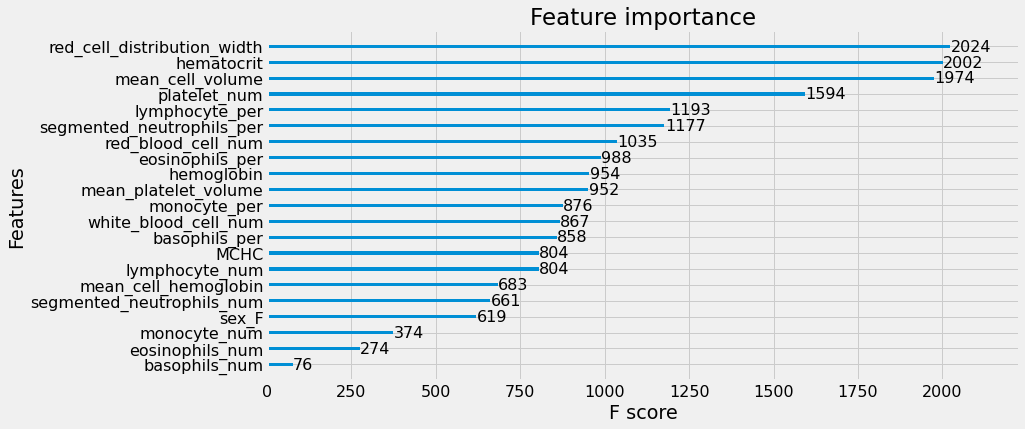

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=22, ax=ax)
plt.show();

#### Delete some features

In [ ]:
num_cols = ['white_blood_cell_num',
 'lymphocyte_per',
 'monocyte_per',
 'segmented_neutrophils_per',
 'eosinophils_per',
 'basophils_per',
 'lymphocyte_num',
 'segmented_neutrophils_num',
 'red_blood_cell_num',
 'hemoglobin',
 'hematocrit',
 'mean_cell_volume',
 'mean_cell_hemoglobin',
 'MCHC',
 'red_cell_distribution_width',
 'platelet_num',
 'mean_platelet_volume']
cat_cols = ['sex']

good_columns2 = [*num_cols]

In [ ]:
X_test_data_new = data_test[good_columns2]

In [ ]:
X_test_data_new = X_test_data[X_test_data.columns[~X_test_data.columns.isin(['basophils_num', 'monocyte_num', 'sex_F', 'eosinophils_num', 'sex_M'])]]


In [ ]:
X_new = X[X.columns[~X.columns.isin(['basophils_num', 'monocyte_num', 'sex_F', 'eosinophils_num', 'sex_M'])]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 315, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
#scaler =StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Train model
reg = Ridge()
reg.fit(X_train, y_train)

#Predict on unseen data
y_pred = reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

14.93250027683229

In [ ]:
X_test_data_new[num_cols] = scaler.transform(X_test_data_new[num_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
y_pred_2 = reg.predict(X_test_data_new)
mean_absolute_error(y_true, y_pred_2.astype('int'))

194.42765100671141

### So min MAE is for Ridge Regression.